# Location Finding Notebook

#### Use this notebook to find location using haversine formula

In [60]:
import tools
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs

In [61]:
lat1 = -53 #SPA
lat2 = 7
long1= -169 #SPA
long2 = 54.9


distance, bearing = tools.haversine_moon(lat1, long1, lat2, long2)

In [62]:
print(distance)

3721.775015349989


In [63]:
print(bearing)

-2.197014476704616


In [64]:
bearing_deg = np.rad2deg(bearing)+18.8 #add tilt

print(bearing_deg)

-107.07965704431763


In [65]:
land_lat, land_long = tools.track(-78, 0, bearing_deg, distance)

In [66]:
land_long = land_long 
print(land_long)


-113.5414154897088


In [67]:
print(land_lat) 

27.66718811784128


In [83]:
def plot():
    
    fig = plt.figure(figsize=[16, 20])
    plt.tight_layout()
    ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.Mollweide())

    fig.subplots_adjust(bottom=0.05, top=0.95,
                        left=0.04, right=0.95, wspace=0.02)


    ax1.set_extent([-90, 90, 0, 90], ccrs.PlateCarree())
    ax1.gridlines()
    ax1.set_global()

   
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)


    plot = ax1.scatter(land_long, land_lat, marker = 'x', s = 200, c='r', transform =  ccrs.PlateCarree())
    

    ax1.gridlines(draw_labels = True)
    
    plt.show()
    

    


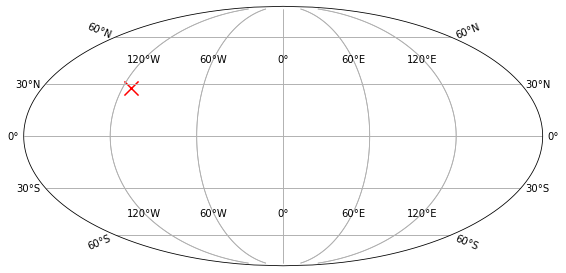

In [84]:
plot()